In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.sparse

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import pairwise_distances

sns.set_style('darkgrid')
sns.set_palette(palette='colorblind')
%matplotlib inline

In [15]:
# # exp_ratings = pd.read_csv('./data/explicit_ratings.csv')

# exp_ratings.drop(columns='Unnamed: 0', inplace=True)

# exp_ratings.head()

# ratings_list = exp_ratings.to_dict('list')

# wide_ratings = {}
# for user, book, rating in zip(exp_ratings['user_id'], exp_ratings['isbn'], exp_ratings['book_rating']):
#     if wide_ratings.get(user):
#         wide_ratings[user][book] = rating
#     else:
#         wide_ratings[user] = {book: rating}

# sdf_ratings = pd.SparseDataFrame(wide_ratings)

# sdf_ratings.head()

# sdf_ratings_scaled = (sdf_ratings - np.nanmean(sdf_ratings, axis=0))/np.nanstd(sdf_ratings, axis=0) 

# sdf_ratings_scaled.head()

# sdf_ratings_scaled.columns = sdf_ratings_scaled.columns.astype(str)

# scaled_coo = sdf_ratings_scaled.to_coo()

# scipy.sparse.save_npz('./data/ratings_scaled_coo.npz', scaled_coo)

In [6]:
foo = scipy.sparse.load_npz('../ratings_scaled_coo.npz')

In [8]:
pd.SparseDataFrame(foo)

,0,1,2,3,4,5,6,7,8,9,...,51752,51753,51754,51755,51756,51757,51758,51759,51760,51761
0,NaN,0.271348,0.866025,0.861727,NaN,1.0,0.559017,0.215666,-1.499113,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215666,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
foo = np.load('../ratings_scaled_coo.npz')

In [16]:
svd = TruncatedSVD(n_components=100, random_state=44)

In [17]:
svd_ratings = svd.fit_transform(sdf_ratings_scaled.fillna(0).T)

In [ ]:
svd_ratings.head()

In [18]:
svd_ratings.shape

(51762, 100)

In [23]:
svd.components_.shape

(100, 18263)

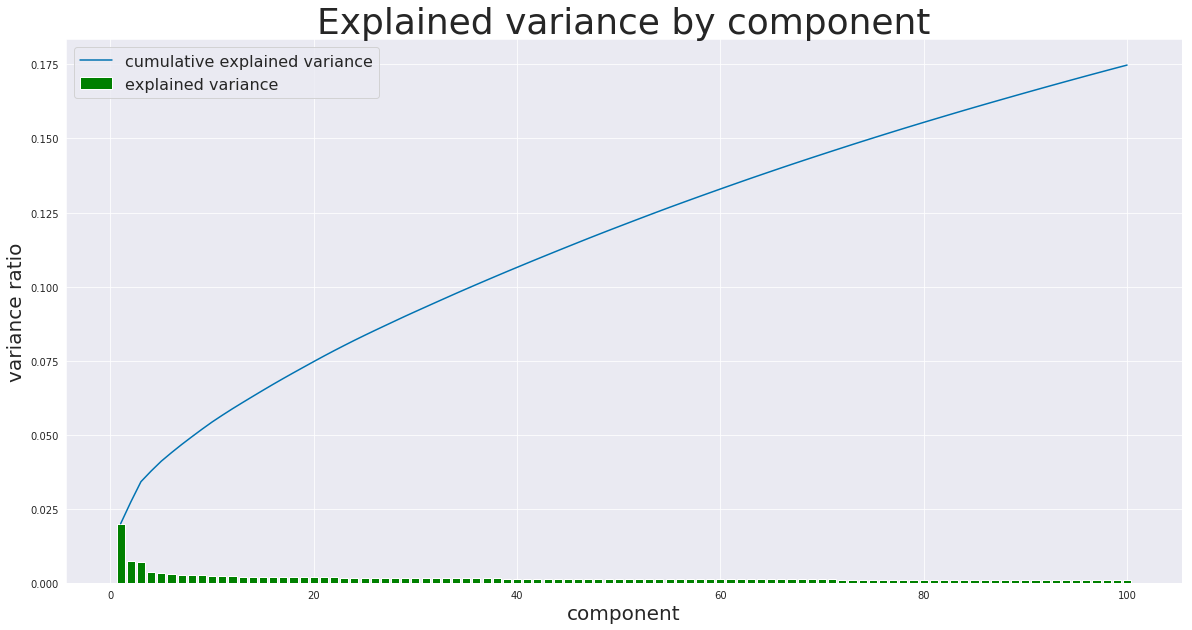

In [19]:
fig = plt.figure(figsize=(20,10))
plt.bar(np.array(range(100))+1, 
        svd.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(100))+1, 
         np.cumsum(svd.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend(fontsize=16)
plt.xlabel('component', fontsize=20)
plt.ylabel('variance ratio', fontsize=20)
plt.title('Explained variance by component', fontsize=36);

In [20]:
U = pairwise_distances(svd_ratings, svd_ratings, metric="cosine")

In [42]:
target_book = sdf_ratings_scaled.index.tolist().index('1567183808')

book_sim = U[target_book]

recs = pd.DataFrame(
    list(zip(sdf_ratings_scaled.index.tolist(), book_sim)), columns=['book', 'distance'])

recs.sort_values('distance').head(10)

,book,distance
16546,1567183808,0.000000
16525,1565920015,0.000075
16527,1565922840,0.001037
16548,1567184693,0.002627
16526,1565921496,0.020379
14199,0767908473,0.043628
16565,156836010X,0.067397
15750,0887309100,0.105097
15506,0874772362,0.170092
16550,1567186610,0.218507


In [43]:
exp_ratings[exp_ratings['isbn'] == '1565920015']

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
223367,1565920015,Unix in a Nutshell: System V &amp; Solaris 2.0,Daniel Gilly,1995,O'Reilly,87141,8
223368,1565920015,Unix in a Nutshell: System V &amp; Solaris 2.0,Daniel Gilly,1995,O'Reilly,87885,10
223369,1565920015,Unix in a Nutshell: System V &amp; Solaris 2.0,Daniel Gilly,1995,O'Reilly,112173,5
223370,1565920015,Unix in a Nutshell: System V &amp; Solaris 2.0,Daniel Gilly,1995,O'Reilly,171118,8


In [ ]:
exp_ratings[exp_ratings['book_title'].str.contains('Hunger Games')]